In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from scipy import stats

In [2]:
import json
plt_properties = json.load(open('utils/plt_properties.json'))
fig_width = plt_properties['fig_width']
plt.rcParams.update(plt_properties['plt_params'])

In [3]:
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from bland_altman import bland_altman_plot
from correlation import plot_regression, plot_group_differences
from permutation_test import permutation_test_repeated
from variables import min_pred_col, vol_pred_col, target_col

In [4]:
df = pd.read_csv('../Data/dataset_mlr.csv')

/tmp/ipykernel_83314/900100850.py:1: DtypeWarning: Columns (12,22,23,24,25,35,36,37,38,39,44,48,49,53,54,55,61,72,76,121,122,124,125,127,136,138,139,140,141,142,143,144,152,157,158,159,161,162,163,210,216,218,219,221,233,251,252,254,503,509,511,513,515,519,523,525,527,529) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/dataset_mlr.csv')


# 7) Group differences

## 7.1) Regression plots

### 7.1.1) By duration

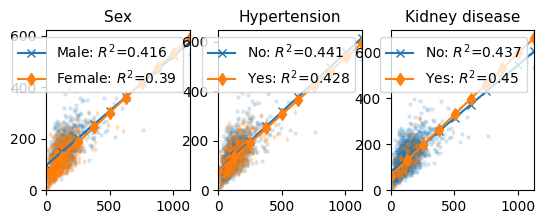

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.33 * fig_width))

x = df[min_pred_col]
y = df[target_col]

plot_group_differences(x, y, df['sex'], ax[0])
ax[0].set_title('Sex')

plot_group_differences(x, y, df['hypertension_combined'], ax[1])
ax[1].set_title('Hypertension')

plot_group_differences(x, y, df['k_dis'], ax[2])
ax[2].set_title('Kidney disease');

### 7.1.2) By volume

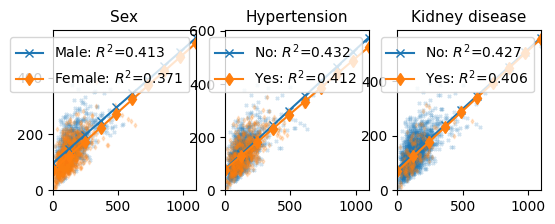

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.33 * fig_width))

x = df[vol_pred_col]
y = df[target_col]

plot_group_differences(x, y, df['sex'], ax[0])
ax[0].set_title('Sex')

plot_group_differences(x, y, df['hypertension_combined'], ax[1])
ax[1].set_title('Hypertension')

plot_group_differences(x, y, df['k_dis'], ax[2])
ax[2].set_title('Kidney disease');

## 7.2) Bland-Altman plots

In [7]:
def mean(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def mean_perm_test_repeated(diff1, diff2, diff1_id, diff2_id):
    return permutation_test_repeated(diff1, diff2, diff1_id, diff2_id, mean, n_resamples=1e4,
        permutation_type='independent', alternative='two-sided', random_state=42).pvalue

### 7.2.1) Sex

R[write to console]: Loading required package: nlme



[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.00019998000199980003.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.7023297670232976.
p-value different (ND): 0.961
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.007999200079992.
[1] "CAUTION! Parametric bootstrap implementation

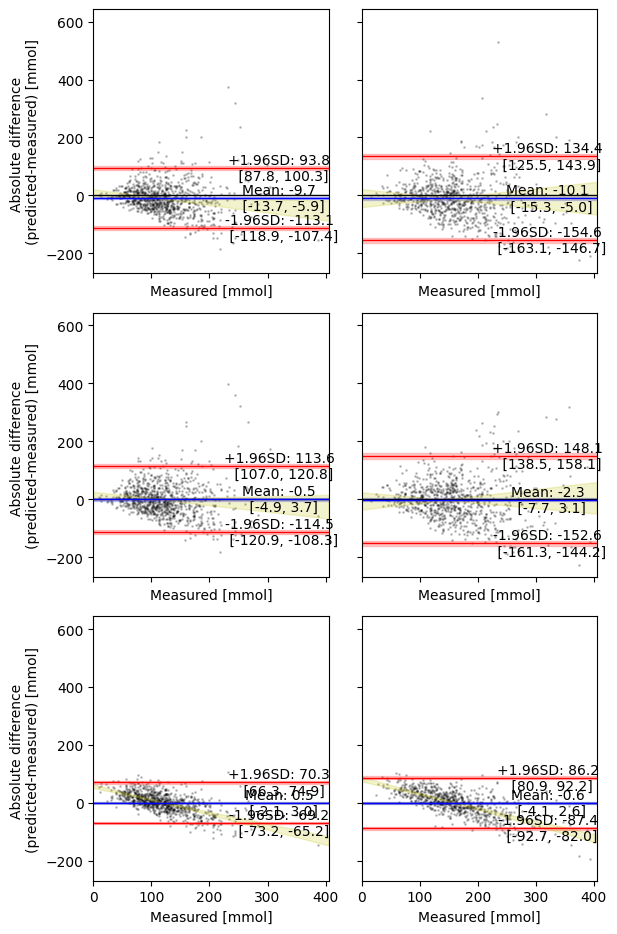

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1.5 * fig_width), sharey=True, sharex=True)

df_female = df[df['sex']=='Female']
df_male = df[df['sex']=='Male']

# Duration
diff_female = bland_altman_plot(df_female[target_col], df_female[min_pred_col], df_female['sk1_id'], ax=ax[0][0], x_true=True)
diff_male = bland_altman_plot(df_male[target_col], df_male[min_pred_col], df_male['sk1_id'], ax=ax[0][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_female, diff_male, df_female['sk1_id'], df_male['sk1_id']), 3))
ax[0][1].set_ylabel('')

# Mean volume
diff_female = bland_altman_plot(df_female[target_col], df_female[vol_pred_col], df_female['sk1_id'], ax=ax[1][0], x_true=True)
diff_male = bland_altman_plot(df_male[target_col], df_male[vol_pred_col], df_male['sk1_id'], ax=ax[1][1], x_true=True)
print('p-value different (NMV):', round(mean_perm_test_repeated(diff_female, diff_male, df_female['sk1_id'], df_male['sk1_id']), 3))
ax[1][1].set_ylabel('')

# Multivariate linear regression
df_female = df_female[~(df_female.mlr_preds.isna())]
df_male = df_male[~(df_male.mlr_preds.isna())]
diff_female = bland_altman_plot(df_female[target_col], df_female.mlr_preds, df_female['sk1_id'], ax=ax[2][0], x_true=True)
diff_male = bland_altman_plot(df_male[target_col], df_male.mlr_preds, df_male['sk1_id'], ax=ax[2][1], x_true=True)
print('p-value different (MLR):', round(mean_perm_test_repeated(diff_female, diff_male, df_female['sk1_id'], df_male['sk1_id']), 3))
ax[2][1].set_ylabel('')

fig.tight_layout()

### 7.2.2) Kidney disease

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.0397960203979602.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."

/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


p-value no correlation x-y: 0.0461953804619538.
p-value different (ND): 0.176
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.4413558644135586.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."

/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


p-value no correlation x-y: 0.3487651234876512.
p-value different (ND): 0.161
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.00019998000199980003.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."

/home/arthur/miniconda3/envs/hiwi/lib/python3.11/site-packages/scipy/stats/_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


p-value no correlation x-y: 0.00019998000199980003.
p-value different (MLR): 0.123


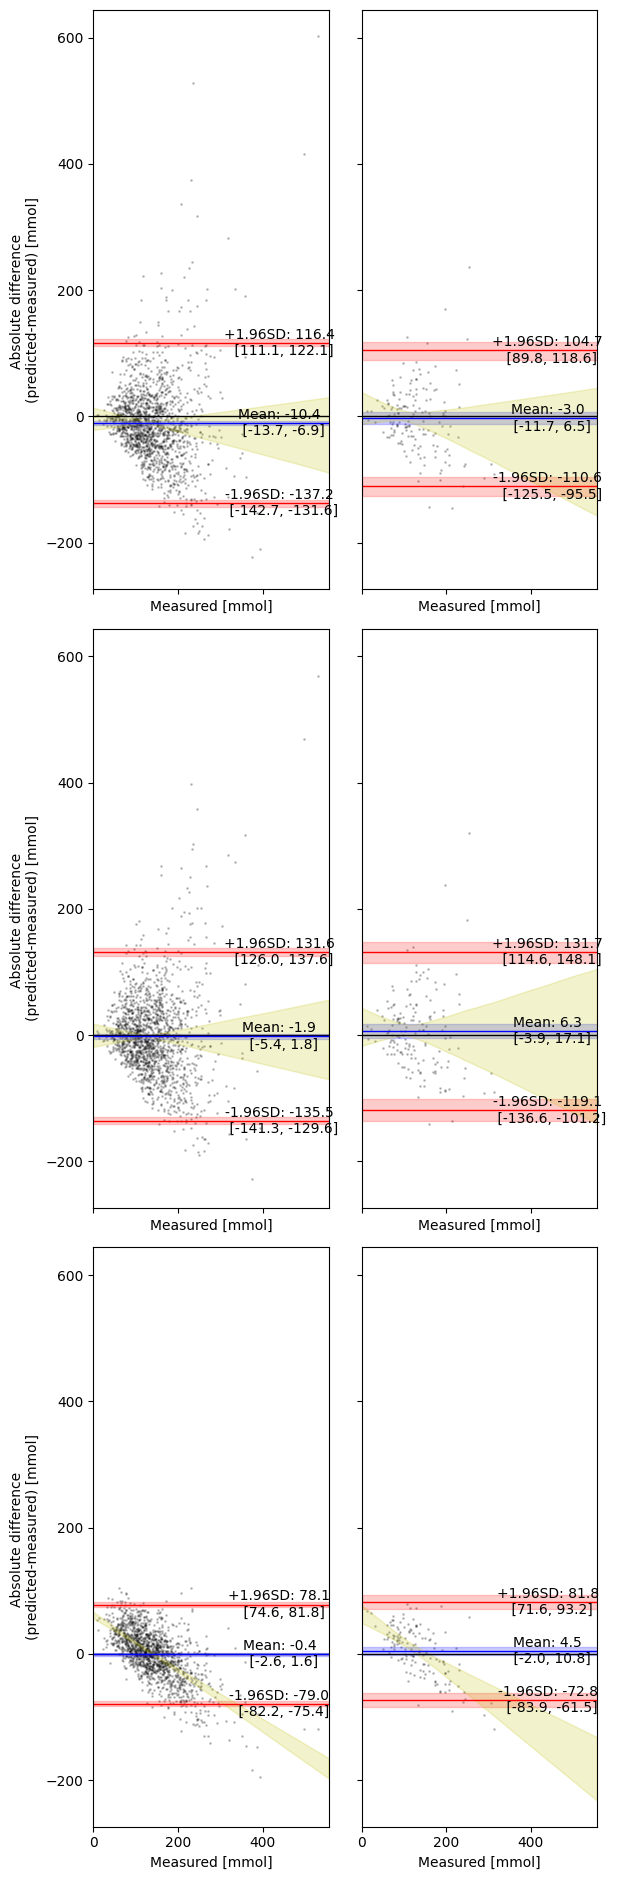

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 3 * fig_width), sharey=True, sharex=True)

df_nokid = df[df['k_dis']=='No']
df_kid = df[df['k_dis']=='Yes']

# Duration
diff_nokid = bland_altman_plot(df_nokid[target_col], df_nokid[min_pred_col], df_nokid['sk1_id'], ax=ax[0][0], x_true=True)
diff_kid = bland_altman_plot(df_kid[target_col], df_kid[min_pred_col], df_kid['sk1_id'], ax=ax[0][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_nokid, diff_kid, df_nokid['sk1_id'], df_kid['sk1_id']), 3))
ax[0][1].set_ylabel('')

# Mean volume
diff_nokid = bland_altman_plot(df_nokid[target_col], df_nokid[vol_pred_col], df_nokid['sk1_id'], ax=ax[1][0], x_true=True)
diff_kid = bland_altman_plot(df_kid[target_col], df_kid[vol_pred_col], df_kid['sk1_id'], ax=ax[1][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_nokid, diff_kid, df_nokid['sk1_id'], df_kid['sk1_id']), 3))
ax[1][1].set_ylabel('')

# Multivariate linear regression
df_nokid = df_nokid[~(df_nokid.mlr_preds.isna())]
df_kid = df_kid[~(df_kid.mlr_preds.isna())]
diff_nokid = bland_altman_plot(df_nokid[target_col], df_nokid.mlr_preds, df_nokid['sk1_id'], ax=ax[2][0], x_true=True)
diff_kid = bland_altman_plot(df_kid[target_col], df_kid.mlr_preds, df_kid['sk1_id'], ax=ax[2][1], x_true=True)
print('p-value different (MLR):', round(mean_perm_test_repeated(diff_nokid, diff_kid, df_nokid['sk1_id'], df_kid['sk1_id']), 3))
ax[2][1].set_ylabel('')

fig.tight_layout()

### 7.2.3) Hypertension

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.024397560243975602.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.1775822417758224.
p-value different (ND): 0.0
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.20957904209579042.
[1] "CAUTION! Parametric bootstrap implementation d

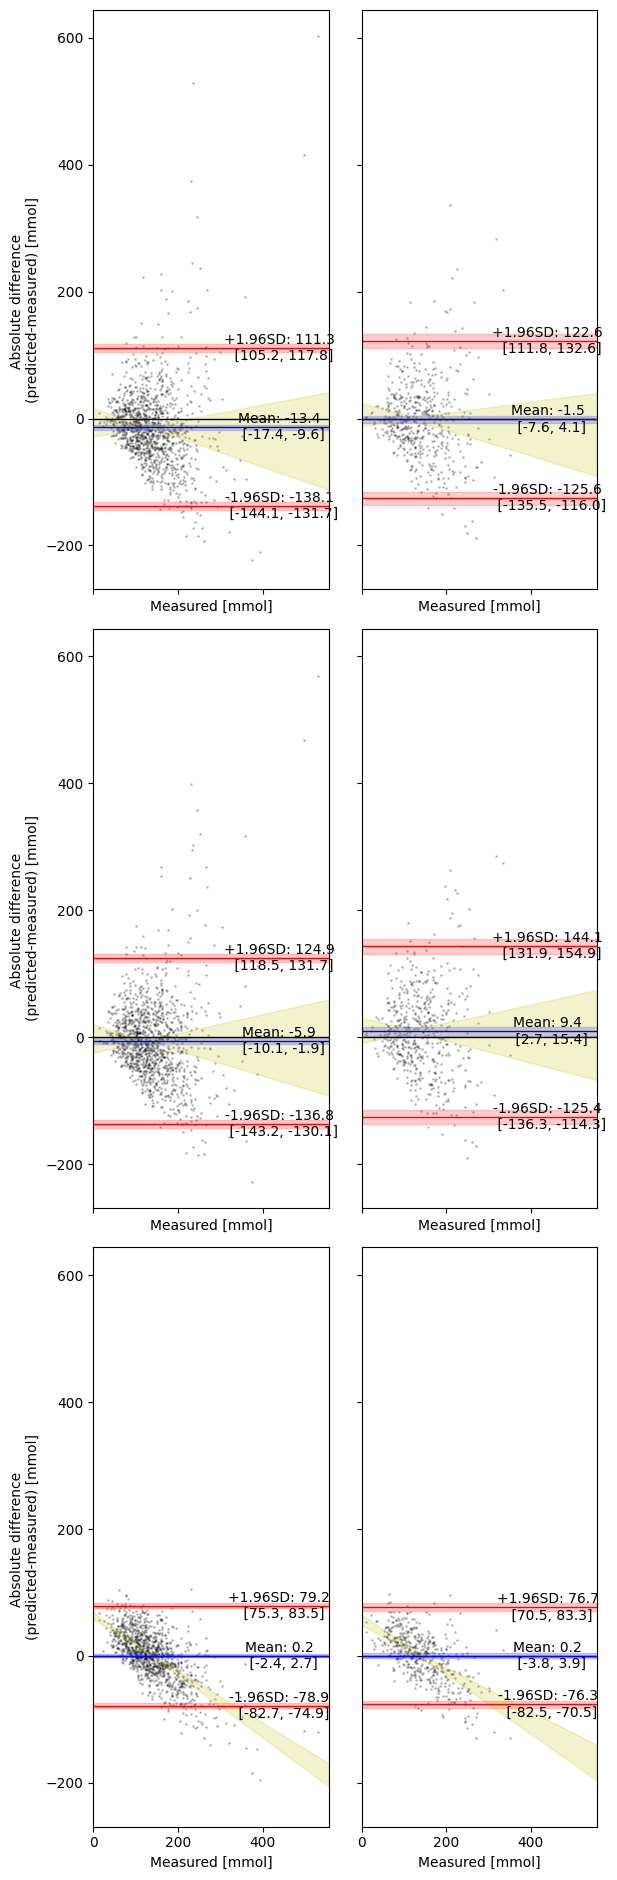

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 3 * fig_width), sharey=True, sharex=True)

df_nohyp = df[df['hypertension_combined']=='No']
df_hyp = df[df['hypertension_combined']=='Yes']

# Duration
diff_nohyp = bland_altman_plot(df_nohyp[target_col], df_nohyp[min_pred_col], df_nohyp['sk1_id'], ax=ax[0][0], x_true=True)
diff_hyp = bland_altman_plot(df_hyp[target_col], df_hyp[min_pred_col], df_hyp['sk1_id'], ax=ax[0][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_nohyp, diff_hyp, df_nohyp['sk1_id'], df_hyp['sk1_id']), 3))
ax[0][1].set_ylabel('')

# Mean volume
diff_nohyp = bland_altman_plot(df_nohyp[target_col], df_nohyp[vol_pred_col], df_nohyp['sk1_id'], ax=ax[1][0], x_true=True)
diff_hyp = bland_altman_plot(df_hyp[target_col], df_hyp[vol_pred_col], df_hyp['sk1_id'], ax=ax[1][1], x_true=True)
print('p-value different (NMV):', round(mean_perm_test_repeated(diff_nohyp, diff_hyp, df_nohyp['sk1_id'], df_hyp['sk1_id']), 3))
ax[1][1].set_ylabel('')

# Multivariate linear regression
df_nohyp = df_nohyp[~(df_nohyp.mlr_preds.isna())]
df_hyp = df_hyp[~(df_hyp.mlr_preds.isna())]
diff_nohyp = bland_altman_plot(df_nohyp[target_col], df_nohyp.mlr_preds, df_nohyp['sk1_id'], ax=ax[2][0], x_true=True)
diff_hyp = bland_altman_plot(df_hyp[target_col], df_hyp.mlr_preds, df_hyp['sk1_id'], ax=ax[2][1], x_true=True)
print('p-value different (MLR):', round(mean_perm_test_repeated(diff_nohyp, diff_hyp, df_nohyp['sk1_id'], df_hyp['sk1_id']), 3))
ax[2][1].set_ylabel('')

fig.tight_layout()

### 7.2.4) Diabetes

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.0033996600339966003.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.48755124487551244.
p-value different (ND): 0.0
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.12538746125387462.
[1] "CAUTION! Parametric bootstrap implementation

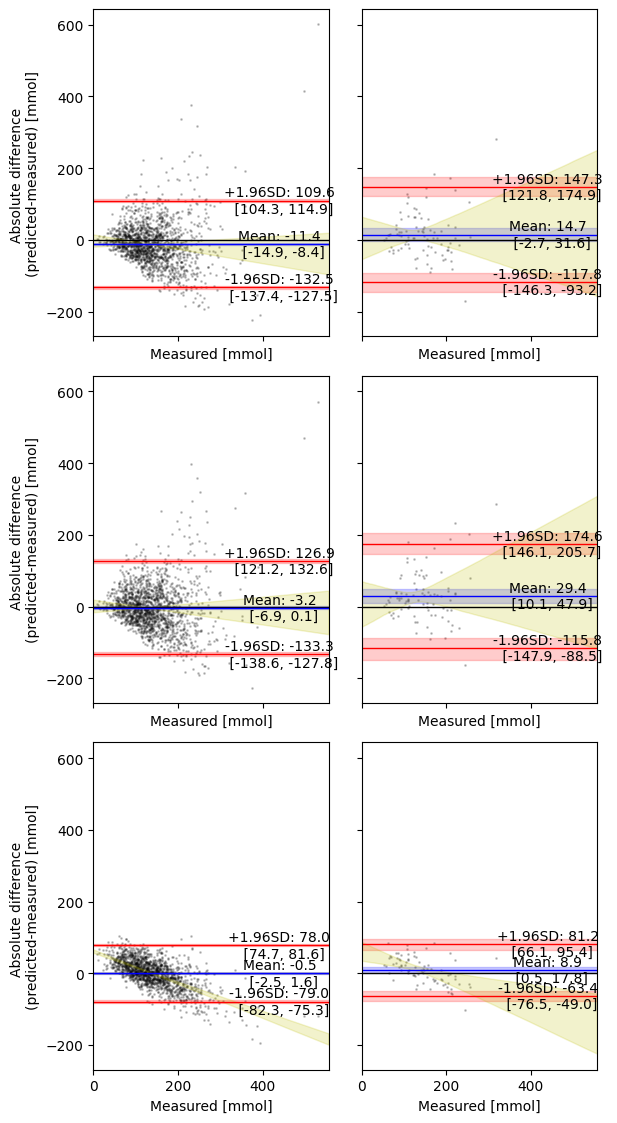

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1.8 * fig_width), sharey=True, sharex=True)

df_nodiab = df[df['diabetes_combined']=='No']
df_diab = df[df['diabetes_combined']=='Yes']

# Duration
diff_nodiab = bland_altman_plot(df_nodiab[target_col], df_nodiab[min_pred_col], df_nodiab['sk1_id'], ax=ax[0][0], x_true=True)
diff_diab = bland_altman_plot(df_diab[target_col], df_diab[min_pred_col], df_diab['sk1_id'], ax=ax[0][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_nodiab, diff_diab, df_nodiab['sk1_id'], df_diab['sk1_id']), 3))
ax[0][1].set_ylabel('')

# Mean volume
diff_nodiab = bland_altman_plot(df_nodiab[target_col], df_nodiab[vol_pred_col], df_nodiab['sk1_id'], ax=ax[1][0], x_true=True)
diff_diab = bland_altman_plot(df_diab[target_col], df_diab[vol_pred_col], df_diab['sk1_id'], ax=ax[1][1], x_true=True)
print('p-value different (NMV):', round(mean_perm_test_repeated(diff_nodiab, diff_diab, df_nodiab['sk1_id'], df_diab['sk1_id']), 3))
ax[1][1].set_ylabel('')

# Multivariate linear regression
df_nodiab = df_nodiab[~(df_nodiab.mlr_preds.isna())]
df_diab = df_diab[~(df_diab.mlr_preds.isna())]
diff_nodiab = bland_altman_plot(df_nodiab[target_col], df_nodiab.mlr_preds, df_nodiab['sk1_id'], ax=ax[2][0], x_true=True)
diff_diab = bland_altman_plot(df_diab[target_col], df_diab.mlr_preds, df_diab['sk1_id'], ax=ax[2][1], x_true=True)
print('p-value different (MLR):', round(mean_perm_test_repeated(diff_nodiab, diff_diab, df_nodiab['sk1_id'], df_diab['sk1_id']), 3))
ax[2][1].set_ylabel('')

fig.tight_layout()

### 7.2.5) HTA drugs

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.029597040295970403.
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.2743725627437256.
p-value different (ND): 0.012
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.3173682631736826.
[1] "CAUTION! Parametric bootstrap implementation 

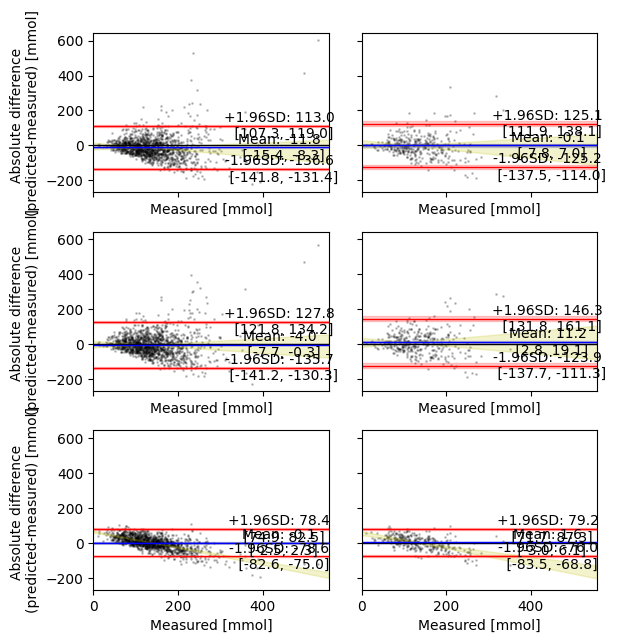

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1 * fig_width), sharey=True, sharex=True)

df_nohta = df[df['d_hta']=='No']
df_hta = df[df['d_hta']=='Yes']

# Duration
diff_nohta = bland_altman_plot(df_nohta[target_col], df_nohta[min_pred_col], df_nohta['sk1_id'], ax=ax[0][0], x_true=True)
diff_hta = bland_altman_plot(df_hta[target_col], df_hta[min_pred_col], df_hta['sk1_id'], ax=ax[0][1], x_true=True)
print('p-value different (ND):', round(mean_perm_test_repeated(diff_nohta, diff_hta, df_nohta['sk1_id'], df_hta['sk1_id']), 3))
ax[0][1].set_ylabel('')

# Mean volume
diff_nohta = bland_altman_plot(df_nohta[target_col], df_nohta[vol_pred_col], df_nohta['sk1_id'], ax=ax[1][0], x_true=True)
diff_hta = bland_altman_plot(df_hta[target_col], df_hta[vol_pred_col], df_hta['sk1_id'], ax=ax[1][1], x_true=True)
print('p-value different (NMV):', round(mean_perm_test_repeated(diff_nohta, diff_hta, df_nohta['sk1_id'], df_hta['sk1_id']), 3))
ax[1][1].set_ylabel('')

# Multivariate linear regression
df_nohta = df_nohta[~(df_nohta.mlr_preds.isna())]
df_hta = df_hta[~(df_hta.mlr_preds.isna())]
diff_nohta = bland_altman_plot(df_nohta[target_col], df_nohta.mlr_preds, df_nohta['sk1_id'], ax=ax[2][0], x_true=True)
diff_hta = bland_altman_plot(df_hta[target_col], df_hta.mlr_preds, df_hta['sk1_id'], ax=ax[2][1], x_true=True)
print('p-value different (MLR):', round(mean_perm_test_repeated(diff_nohta, diff_hta, df_nohta['sk1_id'], df_hta['sk1_id']), 3))
ax[2][1].set_ylabel('')

fig.tight_layout()

## 7.3) Continuous variables

In [13]:
def corr(x, y):
    return np.corrcoef(x, y)[0, 1]

def corr_perm_test(x, y):
    return stats.permutation_test((x.values, y.values), corr, vectorized=False, n_resamples=1e4,
        permutation_type='pairings', alternative='two-sided', random_state=42).pvalue

Coeffs: [0.06291096]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0629      0.006     10.123      0.000       0.051       0.075
PearsonRResult(statistic=0.23488200068270093, pvalue=1.8957637377982086e-23)
0.00019998000199980003
Coeffs: [0.05951289]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0595      0.006     10.180      0.000       0.048       0.071
PearsonRResult(statistic=0.23613050211736694, pvalue=1.0920981617624646e-23)
0.00019998000199980003
Coeffs: [0.00864855]
                             Test for Constraints                             
                 coef    s

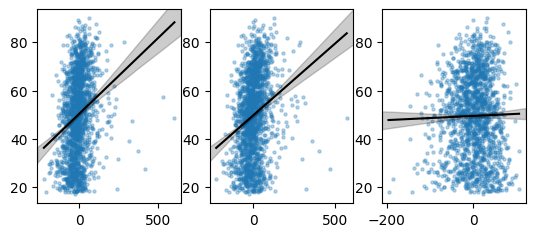

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width))

df_age = df[~df['age'].isna()]
# duration
plot_regression(df_age[min_pred_col]-df_age[target_col], df_age.age, ax[0], show_id=False)
print(stats.pearsonr(df_age[min_pred_col]-df_age[target_col], df_age.age))
print(corr_perm_test(df_age[min_pred_col]-df_age[target_col], df_age.age))
# mean volume
plot_regression(df_age[vol_pred_col]-df_age[target_col], df_age.age, ax[1], show_id=False)
print(stats.pearsonr(df_age[vol_pred_col]-df_age[target_col], df_age.age))
print(corr_perm_test(df_age[vol_pred_col]-df_age[target_col], df_age.age))
# multivariate linear regression
df_age = df_age[~df_age['mlr_preds'].isna()]
plot_regression(df_age.mlr_preds-df_age[target_col], df_age.age, ax[2], show_id=False)
print(stats.pearsonr(df_age.mlr_preds-df_age[target_col], df_age.age))
print(corr_perm_test(df_age.mlr_preds-df_age[target_col], df_age.age))

Coeffs: [0.00299642]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0030      0.002      1.764      0.078      -0.000       0.006
PearsonRResult(statistic=0.04212212607318553, pvalue=0.07787869929579914)
0.07539246075392461
Coeffs: [0.00241225]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0024      0.002      1.509      0.131      -0.001       0.006
PearsonRResult(statistic=0.03603862939013413, pvalue=0.13147536646100833)
0.12758724127587243
Coeffs: [-0.000373]
                             Test for Constraints                             
                 coef    std err       

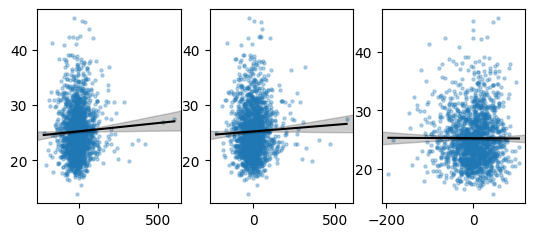

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width))

df_bmi = df[~df['bmi'].isna()]
# duration
plot_regression(df_bmi[min_pred_col]-df_bmi[target_col], df_bmi.bmi, ax[0], show_id=False)
print(stats.pearsonr(df_bmi[min_pred_col]-df_bmi[target_col], df_bmi.bmi))
print(corr_perm_test(df_bmi[min_pred_col]-df_bmi[target_col], df_bmi.bmi))
# mean volume
plot_regression(df_bmi[vol_pred_col]-df_bmi[target_col], df_bmi.bmi, ax[1], show_id=False)
print(stats.pearsonr(df_bmi[vol_pred_col]-df_bmi[target_col], df_bmi.bmi))
print(corr_perm_test(df_bmi[vol_pred_col]-df_bmi[target_col], df_bmi.bmi))
# multivariate linear regression
df_bmi = df_bmi[~df_bmi['mlr_preds'].isna()]
plot_regression(df_bmi.mlr_preds-df_bmi[target_col], df_bmi.bmi, ax[2], show_id=False)
print(stats.pearsonr(df_bmi.mlr_preds-df_bmi[target_col], df_bmi.bmi))
print(corr_perm_test(df_bmi.mlr_preds-df_bmi[target_col], df_bmi.bmi))